In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
telecom_df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
telecom_df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
telecom_df.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
print(telecom_df.shape)

(7043, 21)


In [ ]:
print("Features of the dataset:")
telecom_df.columns

Features of the dataset:


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
telecom_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
 telecom_df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [ ]:
telecom_df.describe(include="all")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [ ]:
print(telecom_df.Churn.value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [ ]:
telecom_df.isna().sum()
telecom_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

AttributeError: module 'matplotlib.pyplot' has no attribute 'ylablel'

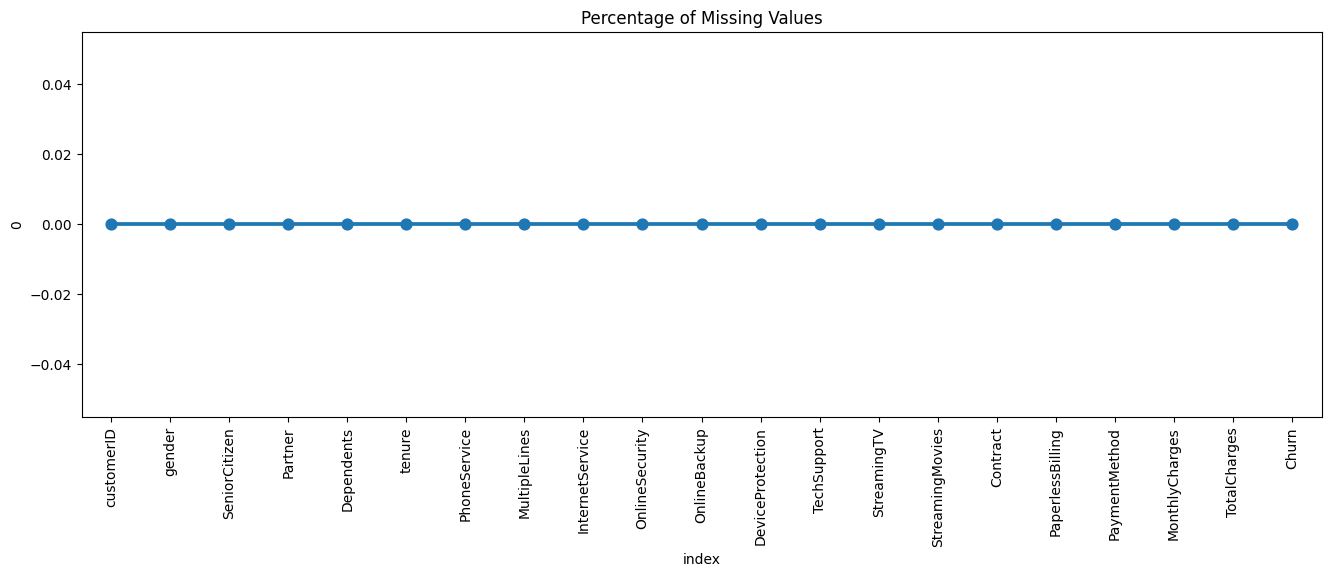

In [ ]:
missing = pd.DataFrame((telecom_df.isnull().sum())*100/telecom_df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index', y=0, data=missing)
plt.xticks(rotation = 90)
plt.title('Percentage of Missing Values')
plt.ylablel("PERCENTAGE")
plt.show()

In [ ]:
len(telecom_df[telecom_df.duplicated()])

0

In [ ]:
telecom_df["Churn"].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
print(telecom_df.Churn.value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


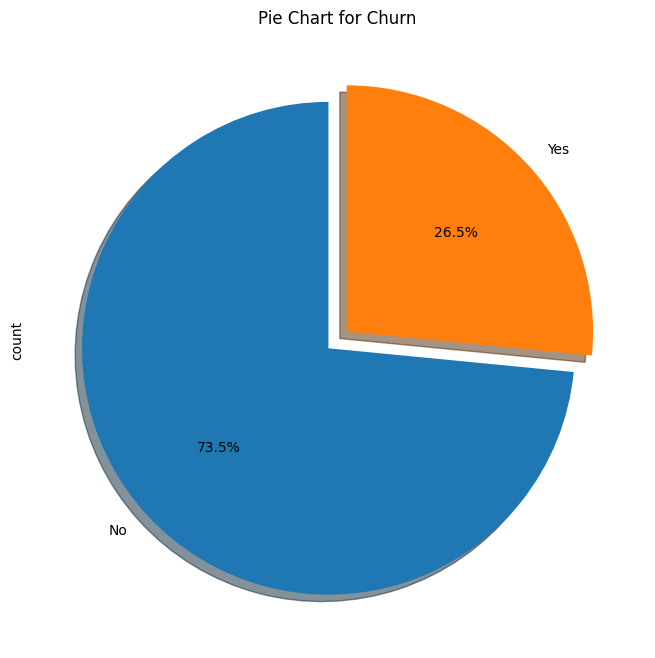

In [ ]:
telecom_df['Churn'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', startangle=90, shadow=True, figsize=(8,8))
plt.title("Pie Chart for Churn")
plt.show()

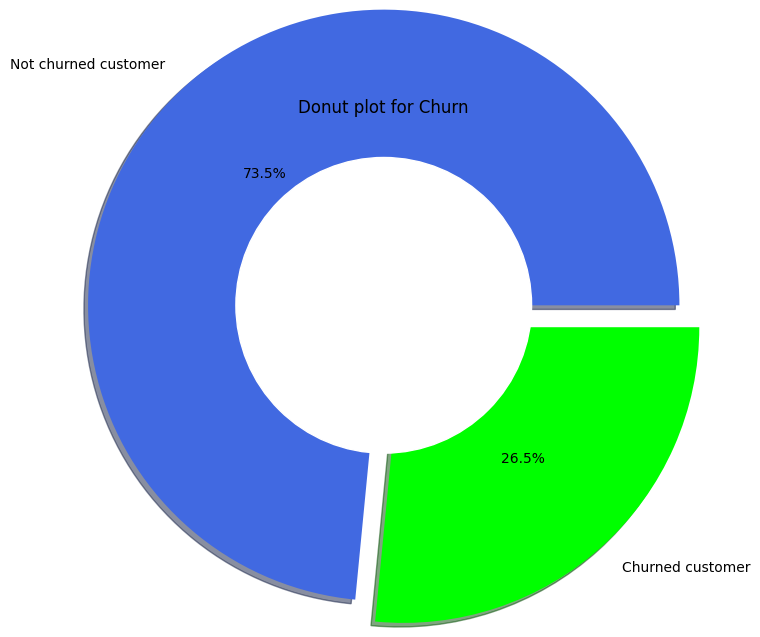

In [ ]:
data = telecom_df['Churn'].value_counts()
explode = (0, 0.2)
plt.pie(data, explode = explode, autopct='%1.1f%%', shadow=True, radius = 2.0, labels = ['Not churned customer','Churned customer'], colors=['royalblue', 'lime'])
circle= plt.Circle((0,0), 1, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Donut plot for Churn')
plt.show()

<Axes: xlabel='Churn', ylabel='count'>

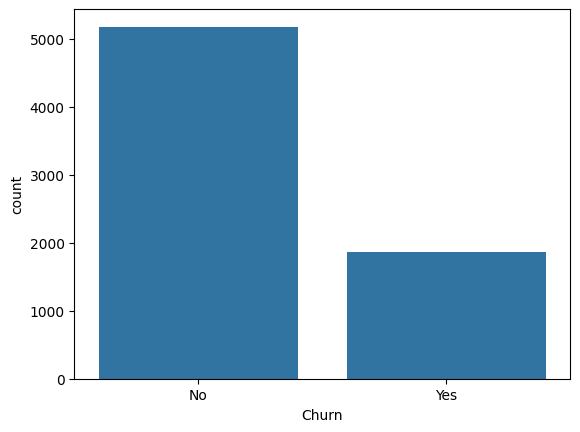

In [ ]:
sns.countplot(x=telecom_df.Churn)

In [ ]:
telecom_df['gender'].nunique()

2

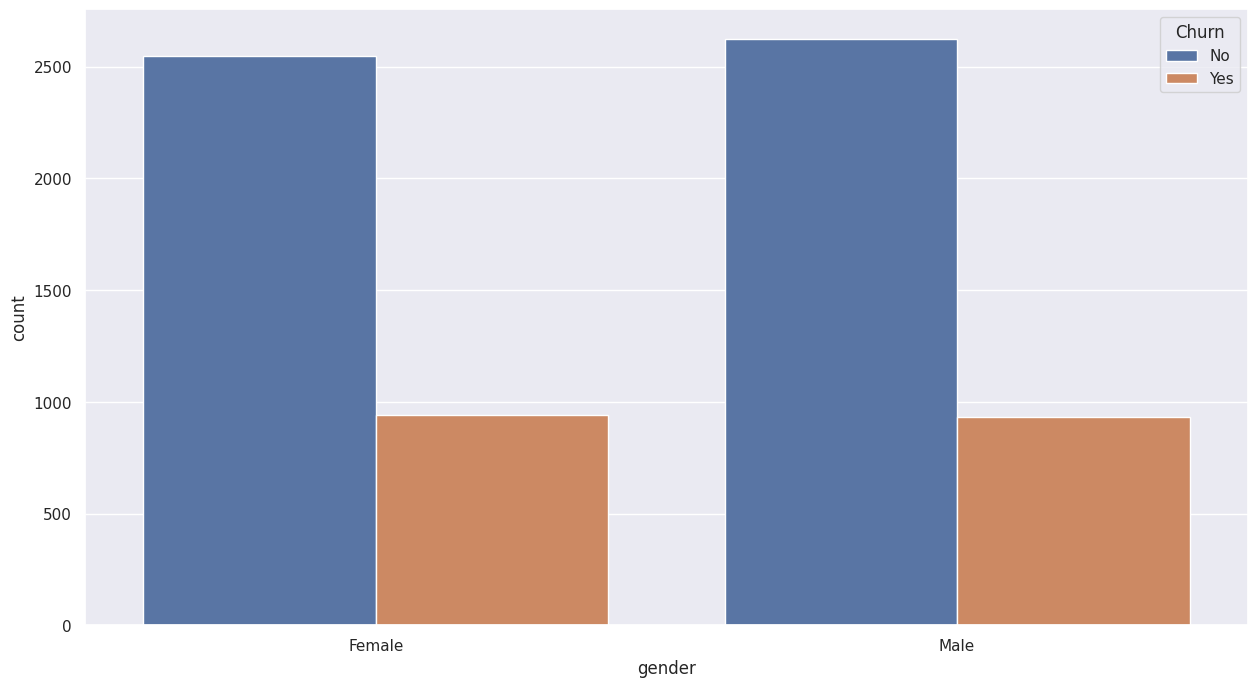

In [ ]:
sns.set(style='darkgrid')
plt.figure(figsize=(15,8))
ax = sns.countplot(x='gender', hue='Churn', data=telecom_df)
plt.show()

In [ ]:
s1 = telecom_df['gender'].unique()
s2 = telecom_df.groupby(['gender'])['Churn'].mean()

plt.rcParams['figure.figsize'] = (18,7)

plt.plot(s1,s2,color='r', marker='o', linewidth=2, marksize=12)

plt.title('gender churn rate', footsize = 20)
plt.xlabel('gender', fontsize = 15)
plt.ylabel('churn rate', fontsize = 15)
plt.show()

TypeError: Could not convert NoYesYesNoYesNoNoYesNoNoNoYesNoNoNoNoYesNoNoNoNoNoYesNoNoYesNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoYesNoYesNoNoNoYesNoYesNoNoNoNoNoNoNoNoYesNoNoYesNoYesYesNoNoYesYesNoYesNoYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoYesNoNoNoNoYesNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoYesYesYesNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoYesNoYesNoYesYesNoNoYesNoNoNoYesNoYesYesNoNoNoYesYesNoYesNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesYesNoNoYesYesNoNoYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoYesNoNoYesYesYesNoYesYesNoNoNoYesYesNoNoYesNoYesNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoYesYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoYesNoYesNoNoYesYesNoYesNoNoNoNoNoNoNoNoYesNoYesNoNoYesNoYesNoNoYesNoNoNoNoYesYesNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoYesYesYesYesNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoYesNoNoYesNoYesYesNoNoNoYesYesYesNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoYesNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesNoYesYesNoNoNoYesNoNoYesNoNoYesNoYesYesNoYesNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoYesYesYesNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoYesNoNoYesNoNoYesYesNoNoNoNoYesNoNoNoNoYesYesNoNoYesNoNoNoYesNoNoNoYesYesNoYesNoNoYesYesNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoYesNoYesNoNoYesNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoYesNoNoNoNoNoNoYesNoNoNoNoYesNoYesNoNoYesYesYesNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoYesNoYesNoNoYesYesNoYesNoNoNoNoNoNoYesYesNoNoYesYesNoNoYesNoNoNoNoYesNoYesNoNoNoNoYesNoYesNoNoYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoYesYesNoNoYesNoNoYesNoNoYesNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesYesNoYesYesNoNoNoYesNoNoNoNoYesYesNoYesYesNoYesNoNoNoNoNoNoNoYesNoNoNoYesNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesYesNoYesNoYesNoYesYesNoYesNoNoYesYesYesYesNoNoYesYesNoYesNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoYesYesNoYesNoYesNoYesYesYesNoNoNoNoNoYesNoYesYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoYesNoNoYesNoYesNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoYesNoYesYesNoNoYesYesNoNoNoNoYesNoNoYesYesNoYesNoYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesYesNoNoYesNoYesNoNoNoYesNoNoNoNoNoNoYesNoNoYesNoYesYesNoNoNoYesNoNoYesNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoYesYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoYesNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoYesYesNoYesNoNoNoYesNoNoNoYesNoYesNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoYesNoNoNoNoYesYesYesYesNoNoYesNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoYesNoYesNoYesNoNoNoYesYesNoNoYesNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoYesNoNoNoNoNoYesYesNoNoNoNoYesNoNoYesNoYesNoYesNoNoYesYesNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoYesNoNoYesNoNoNoNoNoNoYesNoNoNoYesNoNoYesNoYesNoNoNoNoYesNoYesNoNoYesNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoYesNoYesNoNoNoNoYesNoNoYesNoYesNoNoNoNoNoYesYesYesNoNoYesYesNoYesYesNoNoNoYesYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoYesYesNoNoYesNoYesNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoYesNoNoYesYesNoYesYesNoNoNoNoNoNoYesNoYesNoYesNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoYesNoNoYesYesYesNoNoYesNoYesYesNoNoNoYesNoYesNoNoNoNoYesNoNoNoYesNoNoYesNoYesYesYesNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoYesNoYesYesNoYesNoNoYesNoNoYesNoNoNoNoNoYesNoNoYesNoNoNoYesNoNoYesNoNoNoNoYesNoNoNoYesNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesYesNoYesNoNoYesNoYesNoNoNoNoYesNoNoNoNoYesNoYesYesNoNoNoNoYesYesNoNoYesNoNoNoNoNoYesNoYesYesNoNoYesNoYesNoNoYesNoYesNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoYesNoYesYesNoYesYesNoNoNoNoNoNoNoYesYesYesNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoYesNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesNoYesNoNoNoNoYesNoYesNoYesYesNoYesNoNoNoNoNoNoYesNoYesNoYesNoNoNoYesNoNoYesNoNoNoNoNoNoYesNoNoNoYesNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoYesNoYesYesNoYesNoNoYesNoNoYesYesNoYesNoNoNoYesNoNoYesNoYesNoNoNoYesNoNoYesNoNoYesNoNoYesNoNoYesNoYesYesYesNoNoYesYesNoNoNoYesNoNoYesNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoYesNoYesNoNoYesNoYesNoNoNoNoNoYesNoYesYesNoNoNoNoNoYesYesYesNoYesNoNoNoNoYesNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoYesNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoYesYesYesNoYesNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoYesYesNoYesNoYesNoNoYesNoNoYesNoNoYesYesNoNoNoNoNoNoNoYesYesYesNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesNoYesNoYesNoYesYesYesNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoYesYesYesNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoYesYesNoYesNoNoNoYesNoNoNoNoNoYesNoNoYesNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoYesNoYesNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoYesNoNoNoNoNoYesNoNoNoYesNoYesNoYesYesYesNoNoNoNoNoYesYesNoNoNoNoNoNoYesYesNoYesNoNoNoNoYesNoNoYesNoNoNoYesNoYesNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoYesNoNoNoNoNoNoNoYesNoYesYesNoNoNoYesYesNoYesNoNoYesNoNoNoYesNoYesNoYesYesNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoYesNoNoYesNoNoYesNoYesNoNoNoNoNoYesNoYesNoNoNoYesNoNoYesNoNoNoYesNoNoNoYesNoNoYesYesYesNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesYesNoNoYesYesNoNoNoNoNoNoNoYesNoNoYesNoYesNoYesNoYesNoYesNoNoYesNoNoNoNoNoYesYesNoYesNoNoNoNoNoYesNoNoYesYesYesNoNoNoNoNoYesNoYesNoYesNoYesNoNoYesNoNoNoYesYesNoNoYesYesNoNoYesNoNoYesNoNoNoNoYesNoYesNoNoNoYesNoNoNoYesNoNoNoNoNoNoYesNoNoYesNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoYesNoYesYesNoNoYesNoNoNoYesNoYesYesNoNoNoYesNoYesNoNoNoNoNoYesNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoYesNoYesNoNoNoNoYesNoYesNoYesYesNoNoNoNoYesNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoYesNoYesNoYesNoYesYesNoNoNoYesNoNoNoNoYesNoYesNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoYesNoYesNoNoNoYesYesNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoYesNoYesYesNoYesYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoYesNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoYesYesNoNoYesNoNoNoNoYesNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoYesNoNoYesNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoYesNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoYesNoYesYesNoYesNoNoNoYesYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoYesNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesYesNoYesNoNoNoNoYesNoNoNoYesYesYesNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoYesNoNoYesNoYesNoNoNoNoNoNoYesYesYesYesNoYesNoNoYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoYesNoNoNoYesNoYesNoNoNoNoYesYesYesNoNoYesNoNoYesNoYesYesYesNoYesNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoYesNoYesNoYesNoNoNoNoNoYesNoNoNoYesYesNoNoNoNoYesYesNoNoYesYesYesNoNoNoNoNoNoNoNoYesNoNoNoYesYesNoYesNoNoNoNoYesYesYesNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNo to numeric